In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DimCst = pd.read_csv("G:/DataSets/DW/DimCst.csv")

In [3]:
DimLoc = pd.read_csv("G:/DataSets/DW/DimLoc.csv")

In [4]:
DimPrd = pd.read_csv("G:/DataSets/DW/DimPrd.csv")

In [5]:
DimDt = pd.read_csv("G:/DataSets/DW/DimDt.csv")

In [6]:
SalesFct = pd.read_csv("G:/DataSets/DW/SalesFct.csv")

In [7]:
SaleCstsFct = pd.read_csv("G:/DataSets/DW/SaleCstsFct.csv")

In [8]:
DimCst.head()

,CustKey,Customer ID,Customer Name,Segment
0,1,AA-10315,Alex Avila,Consumer
1,2,AA-10375,Allen Armold,Consumer
2,3,AA-10480,Andrew Allen,Consumer
3,4,AA-10645,Anna Andreadi,Consumer
4,5,AB-10015,Aaron Bergman,Consumer


In [9]:
DimLoc.head()

,CityKey,City,State,Country,Region
0,1,Aberdeen,South Dakota,United States,Central
1,2,Abilene,Texas,United States,Central
2,3,Akron,Ohio,United States,East
3,4,Albuquerque,New Mexico,United States,West
4,5,Alexandria,Virginia,United States,South


In [10]:
DimPrd.head()

,Product ID,Product Name,Sub-Category,Category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Bookcases,Furniture
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Bookcases,Furniture
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Bookcases,Furniture
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Bookcases,Furniture
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Bookcases,Furniture


In [11]:
DimDt.head()

,Order Date,Day,Week,Month,Quarter,Year
0,2014-01-03,3,1,1,1,2014
1,2014-01-04,4,1,1,1,2014
2,2014-01-05,5,1,1,1,2014
3,2014-01-06,6,2,1,1,2014
4,2014-01-07,7,2,1,1,2014


In [12]:
SalesFct.head()

,Order Date,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,CostAmt
0,2014-01-03,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,10.8968
1,2014-01-04,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870,9.0270
2,2014-01-04,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717,7.5123
3,2014-01-04,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748,337.5108
4,2014-01-05,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840,14.6520


In [13]:
SaleCstsFct.head()

,Order Date,Customer ID,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal
0,2014-01-03,DP-13000,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512
1,2014-01-04,PO-19195,Naperville,OFF-BI-10004094,2,3.540,0.8,-5.4870
2,2014-01-04,PO-19195,Naperville,OFF-LA-10003223,3,11.784,0.2,4.2717
3,2014-01-04,PO-19195,Naperville,OFF-ST-10002743,3,272.736,0.2,-64.7748
4,2014-01-05,MB-18085,Philadelphia,OFF-AR-10003478,3,19.536,0.2,4.8840


In [14]:
largest = SalesFct.nlargest(3,"SalesQtyTotal")

In [15]:
largest["Product ID"]

4366    OFF-PA-10001954
2807    OFF-BI-10000069
112     OFF-AR-10003631
Name: Product ID, dtype: object

In [16]:
top3product = SalesFct.groupby("Product ID").agg(TotalQty = ('SalesQtyTotal', 'sum'))

In [17]:
top3product.head()

,TotalQty
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12


In [18]:
top3product = top3product.nlargest(3, 'TotalQty')
top3product

,TotalQty
Product ID,
TEC-AC-10003832,75
OFF-PA-10001970,70
OFF-BI-10001524,67


In [19]:
top3product = pd.merge(top3product, DimPrd, on='Product ID')
top3product

,Product ID,TotalQty,Product Name,Sub-Category,Category
0,TEC-AC-10003832,75,Logitech P710e Mobile Speakerphone,Accessories,Technology
1,TEC-AC-10003832,75,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,Accessories,Technology
2,OFF-PA-10001970,70,Xerox 1908,Paper,Office Supplies
3,OFF-PA-10001970,70,Xerox 1881,Paper,Office Supplies
4,OFF-BI-10001524,67,GBC Premium Transparent Covers with Diagonal L...,Binders,Office Supplies


In [20]:
top3product = top3product[['Product ID', 'Product Name','TotalQty']]
top3product

,Product ID,Product Name,TotalQty
0,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,75
1,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,75
2,OFF-PA-10001970,Xerox 1908,70
3,OFF-PA-10001970,Xerox 1881,70
4,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,67


<BarContainer object of 5 artists>

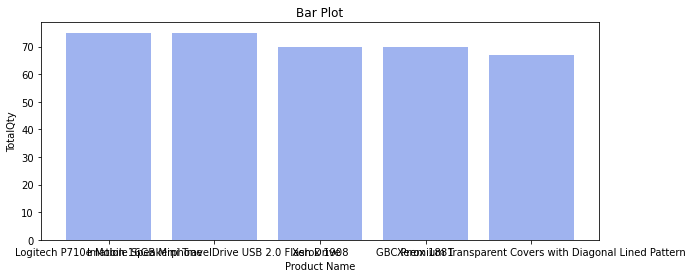

In [21]:
plt.figure(figsize=(10,4))
plt.title("Bar Plot")
plt.xlabel("Product Name")
plt.ylabel("TotalQty")
plt.bar(top3product['Product Name'], top3product.TotalQty, color='royalblue', alpha=0.5)

In [22]:
top3category = pd.merge(SalesFct,DimPrd, on='Product ID')
top3category.head()

,Order Date,City,Product ID,SalesQtyTotal,SalesAmtTotal,DisAmtTotal,ProfAmtTotal,CostAmt,Product Name,Sub-Category,Category
0,2014-01-03,Houston,OFF-PA-10000174,2,16.448,0.2,5.5512,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
1,2014-02-24,Medford,OFF-PA-10000174,4,32.896,0.2,11.1024,21.7936,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
2,2014-09-07,Santa Clara,OFF-PA-10000174,2,20.560,0.0,9.6632,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
3,2014-09-26,Lancaster,OFF-PA-10000174,4,32.896,0.2,11.1024,21.7936,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies
4,2015-12-03,Philadelphia,OFF-PA-10000174,2,16.448,0.2,5.5512,10.8968,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Paper,Office Supplies


In [23]:
top3category = top3category.groupby("Category").agg(TotalQty = ('SalesQtyTotal', 'sum')).reset_index()
top3category

,Category,TotalQty
0,Furniture,8379
1,Office Supplies,23518
2,Technology,7249


In [24]:
top3category = top3category.nlargest(3, 'TotalQty')
top3category

,Category,TotalQty
1,Office Supplies,23518
0,Furniture,8379
2,Technology,7249


In [26]:
top3category.sort_values('Category',ascending=False)

,Category,TotalQty
2,Technology,7249
1,Office Supplies,23518
0,Furniture,8379
